In [5]:
from toy import *

from jax import random
from jax.config import config
config.update("jax_debug_nans", True)
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

from dynamics import *

In [23]:
n_particles = 500
dim = 2
n_iter = 1000
lr = 0.1

fd = toy_funcdict(optim='sgd', stein_kernel="se", dim=dim, init="med")
fd['RLD_stein'] = RLD_stein(var_obj=fd['obj'], d=1.0)

## PARVI 1: RSVGD
model_1 = ToyModel(fd)
model_1.stein_training(n_iter=n_iter, n_particles=n_particles, key=random.PRNGKey(1), lr=lr, window=10, trace=False, method=('RLD', 'stein'), sgd=False, shuffle=False)

## PARVI 2: SVGD
model_2 = ToyModel(fd)
model_2.stein_training(n_iter=n_iter, n_particles=n_particles, key=random.PRNGKey(10), lr=lr, window=10, trace=False, method=('LD', 'stein'), sgd=False, shuffle=False)


## PARVI 3: SGRHMC_Stein
lr = 0.1
n_iter = 1000
fd = toy_funcdict(optim='sgd', stein_kernel="se", dim=dim, init="med")
fd['RHMC_stein'] = RHMC_stein(var_obj=fd['obj'], d=1.5, invsigma=50.0, a=0.2)
model_3 = ToyModel(fd)
model_3.stein_training(n_iter=n_iter, n_particles=n_particles, key=random.PRNGKey(1), lr=lr, window=10, trace=False, method=('RHMC', 'stein'), sgd=False, shuffle=False)

## PARVI 4: SGHMC_Stein
fd = toy_funcdict(optim='sgd', stein_kernel="se", dim=dim, init="med")
fd['HMC_stein'] = HMC_stein(invsigma=50.0, a=0.2)
model_4 = ToyModel(fd)
model_4.stein_training(n_iter=n_iter, n_particles=n_particles, key=random.PRNGKey(1), lr=lr, window=10, trace=False, method=('HMC', 'stein'), sgd=False, shuffle=False)


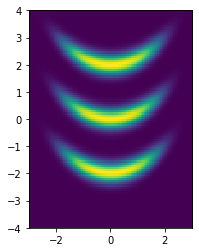

In [20]:
# plot likelihood
ux = lambda x, y, z: -1 * (np.power(x[..., 0], 4) / 10.0 + (4 * (z * x[..., 1] + y) - x[..., 0] ** 2) ** 2 / 2.)
loglik_func = lambda z: logsumexp(np.array([ux(z, 0.0, 1.0), ux(z, -2.0, 1.0), ux(z, 2.0, 1.0)]) - np.log(3.0), axis=0)

x = np.stack(np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-4, 4, 100)), axis=-1)

y = loglik_func(x)

plt.imshow(np.flipud(np.exp(y)), extent=(-3, 3, -4, 4))

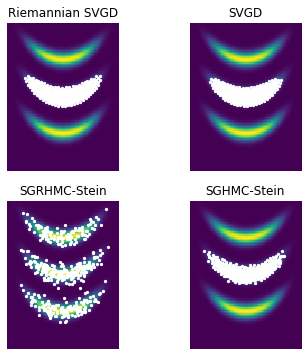

In [37]:
# output the PARVI results

f, axarr = plt.subplots(2, 2, figsize=(6, 6))

ax = axarr[0,0]
ax.axis('off')
ax.imshow(np.flipud(np.exp(y)), extent=(-3, 3, -4, 4))
z = model_1.traces[-1][0]
ax.scatter(z[:, 0], z[:, 1], s=5, c='white')
ax.set_title("Riemannian SVGD")

ax = axarr[0,1]
ax.axis('off')
z = model_2.traces[-1][0]
ax.set_title("SVGD")
ax.imshow(np.flipud(np.exp(y)), extent=(-3, 3, -4, 4))
ax.scatter(z[:, 0], z[:, 1], s=5, c='white')

ax = axarr[1,0]
ax.axis('off')
z = model_3.traces[-1][0]
ax.scatter(z[:, 0], z[:, 1], s=5, c='white')
ax.imshow(np.flipud(np.exp(y)), extent=(-3, 3, -4, 4))
ax.set_title("SGRHMC-Stein")

ax = axarr[1,1]
ax.axis('off')
z = model_4.traces[-1][0]
ax.set_title("SGHMC-Stein")
ax.imshow(np.flipud(np.exp(y)), extent=(-3, 3, -4, 4))
ax.scatter(z[:, 0], z[:, 1], s=5, c='white')
